### The following is an analysis of a dataset of IGN video game rating scores, uploaded by a reddit user. The data can be found here: https://www.reddit.com/r/datasets/comments/2awdgx/i_made_this_dataset_of_all_of_igns_game_reviews/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gamedata = pd.read_excel('gamedata.xlsx')

In [3]:
gamedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17534 entries, 0 to 17533
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Game      17534 non-null  object 
 1   Platform  17534 non-null  object 
 2   Score     17534 non-null  float64
 3   Genre     17534 non-null  object 
dtypes: float64(1), object(3)
memory usage: 548.1+ KB


No null values! Nice!

In [4]:
gamedata.head(n=5)

,Game,Platform,Score,Genre
0,Wolfenstein: The New Order,Xbox One,7.8,Shooter
1,Mario Kart 8,Wii U,9.0,"Racing, Action"
2,Sportsfriends,PlayStation 3,8.7,"Action, Compilation"
3,Sportsfriends,PlayStation 4,8.7,"Action, Compilation"
4,Sportsfriends,PC,8.7,"Action, Compilation"


While exploring the data, I noticed that some of the titles of the games had white space at the end of the name, while others didn't. For uniformity, I erase the white space after the game titles. 

In [5]:
#Erasing the white space from the Genre and Platform labels, and erasing any white space to the right of the string in the Game column

for i in range(17534):
    gamedata.Genre[i] = gamedata.Genre[i].replace(",","")
    gamedata.Genre[i] = gamedata.Genre[i].replace(" ", "_")
    gamedata.Platform[i] = gamedata.Platform[i].replace(" ", "_")
    gamedata.Game[i] = str(gamedata.Game[i]).rstrip()

/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Next we give the frequency of the different ratings.

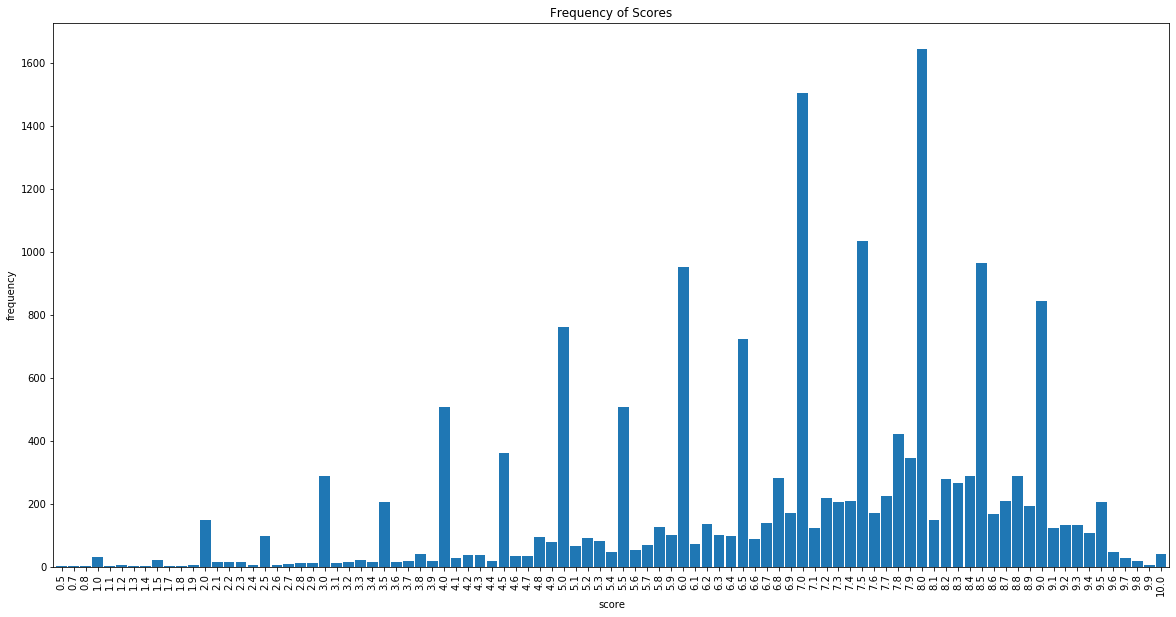

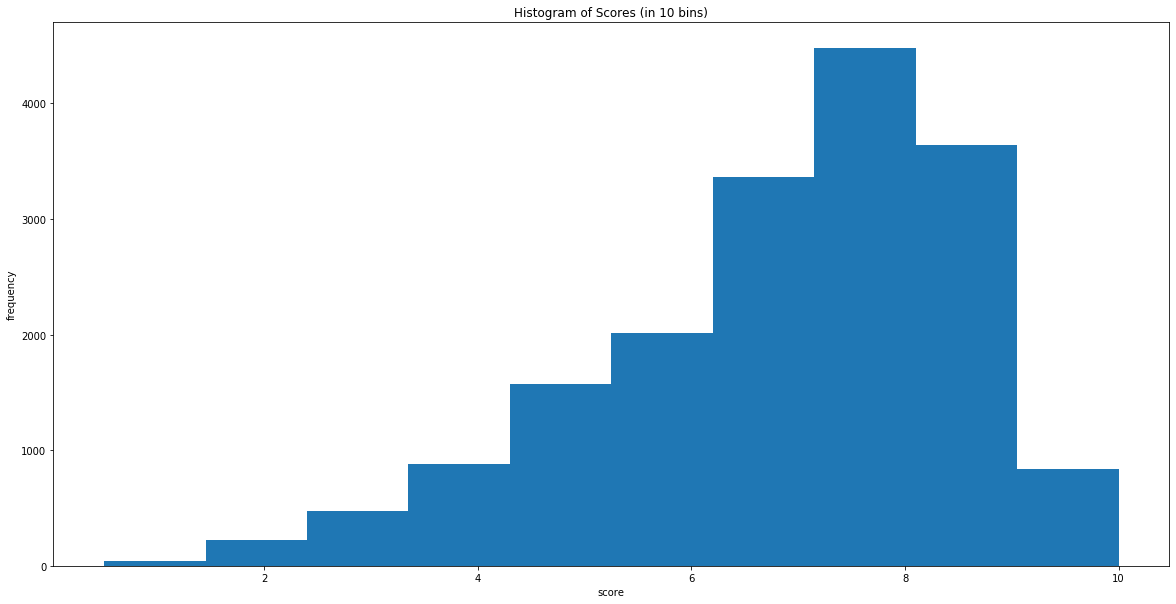

In [6]:
x = np.sort(gamedata.Score.unique())

ax = pd.Series(gamedata.loc[:,'Score']).value_counts().loc[x].plot(kind='bar', figsize=(20,10), title='Scores', width = 0.90 )
plt.xlabel('score')
plt.ylabel('frequency')
plt.title('Frequency of Scores')
plt.show()

plt.figure(figsize = (20,10))
plt.hist(gamedata.loc[:,'Score'], bins = 10)
#ax = pd.Series(gamedata.loc[:,'Score']).value_counts().loc[x].plot(kind='hist', bins = 10 figsize=(20,10), title='Scores', width = 0.90 )
plt.xlabel('score')
plt.ylabel('frequency')
plt.title('Histogram of Scores (in 10 bins)')
plt.show()

In [7]:
print('the average score is:', gamedata.loc[:,'Score'].mean())
print('the median score is:', gamedata.loc[:,'Score'].median())

the average score is: 6.914537470058162
the median score is: 7.2


### Analyzing by Platform
Below, we create a dictionary (called reviews) containing dataframes for each individual platform. 

In [9]:
names = gamedata.Platform.unique()
reviews = {}

for platform in names:   
    df_name =  platform # the name for the dataframe
    reviews[df_name] =  pd.DataFrame(columns = gamedata.columns)

## (Check to see if I still need the .replace() below)

In [10]:
for df in reviews.keys():
    for i in range(17534):
        if '%s' %df == gamedata.loc[i,'Platform'].replace(" ", "_"):
            reviews[df].loc[i,:] = gamedata.loc[i,:]
            

Plotting the average and median scores by platform

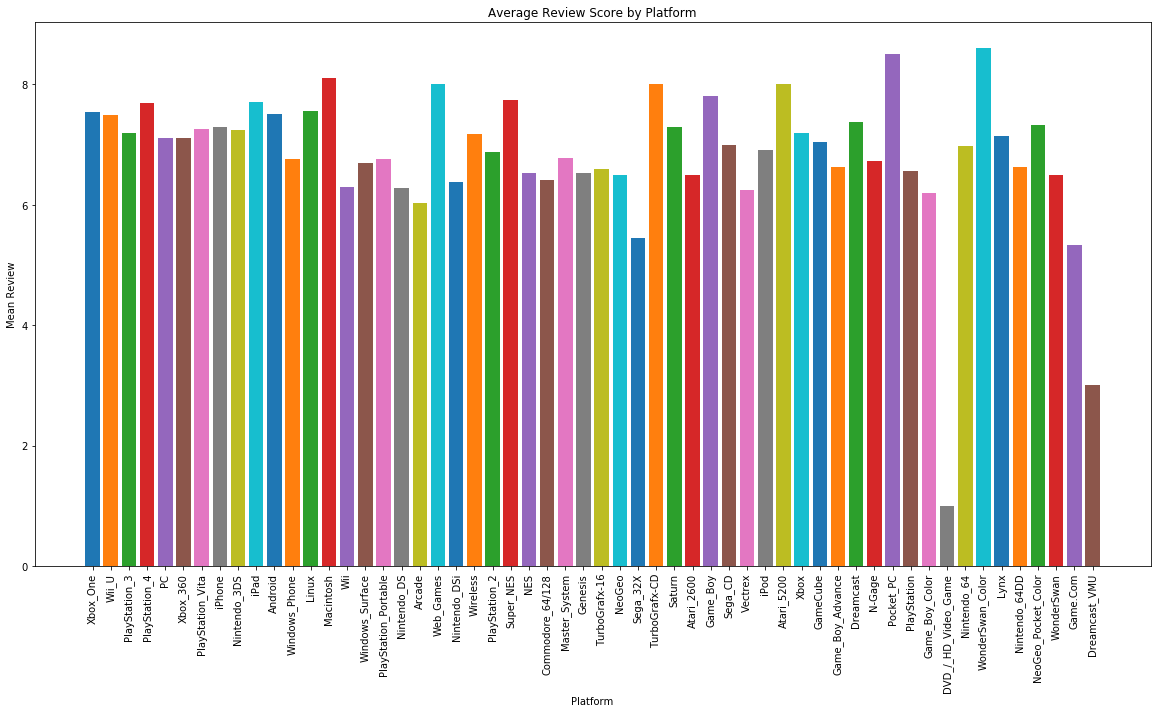

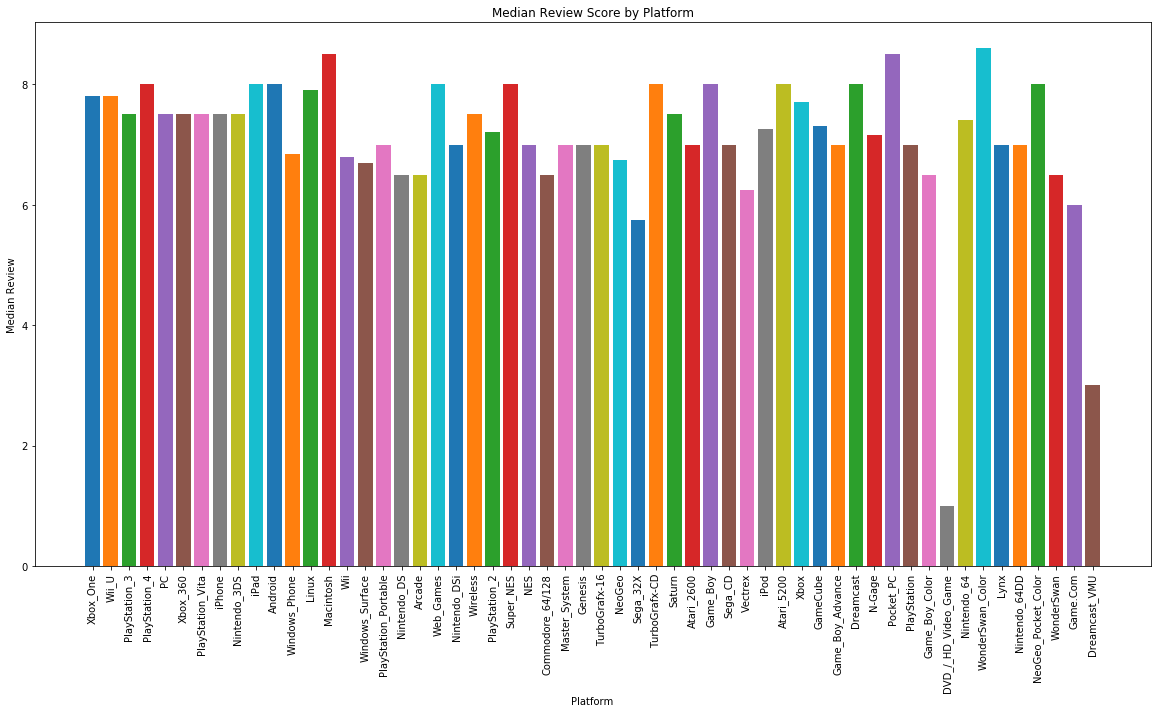

In [47]:
#average review score by platform
plt.figure(figsize = (20,10))
for df in reviews.keys():
    plt.bar('%s' %df,reviews['%s' %df].Score.mean())

plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('Mean Review')
plt.title('Average Review Score by Platform')
plt.show()


#median review score by platform
plt.figure(figsize = (20,10))
for df in reviews.keys():
    plt.bar('%s' %df,reviews['%s' %df].Score.median())

plt.xticks(rotation=90)
plt.xlabel('Platform')
plt.ylabel('Median Review')
plt.title('Median Review Score by Platform')
plt.show()

### Analzing by Genre
Below, we create a dictionary (called reviews2) containing dataframes for each individual platform. 

## (Check to see if I still need the .replace() below)

In [12]:
names2 = gamedata.Genre.unique()
#for i in range(len(names2)):
#    names2[i] = names2[i].replace(",","").replace(" ", "_")

reviews2 = {}

for genre in names2:   
    df_name2 =  genre # the name for the dataframe
    reviews2[df_name2] =  pd.DataFrame(columns = gamedata.columns)
    
for df in reviews2.keys():
    for i in range(17534):
        if '%s' %df == gamedata.loc[i,'Genre'].replace(",","").replace(" ", "_"):
            reviews2[df].loc[i,:] = gamedata.loc[i,:]
            

Plotting the average and median scores by genre

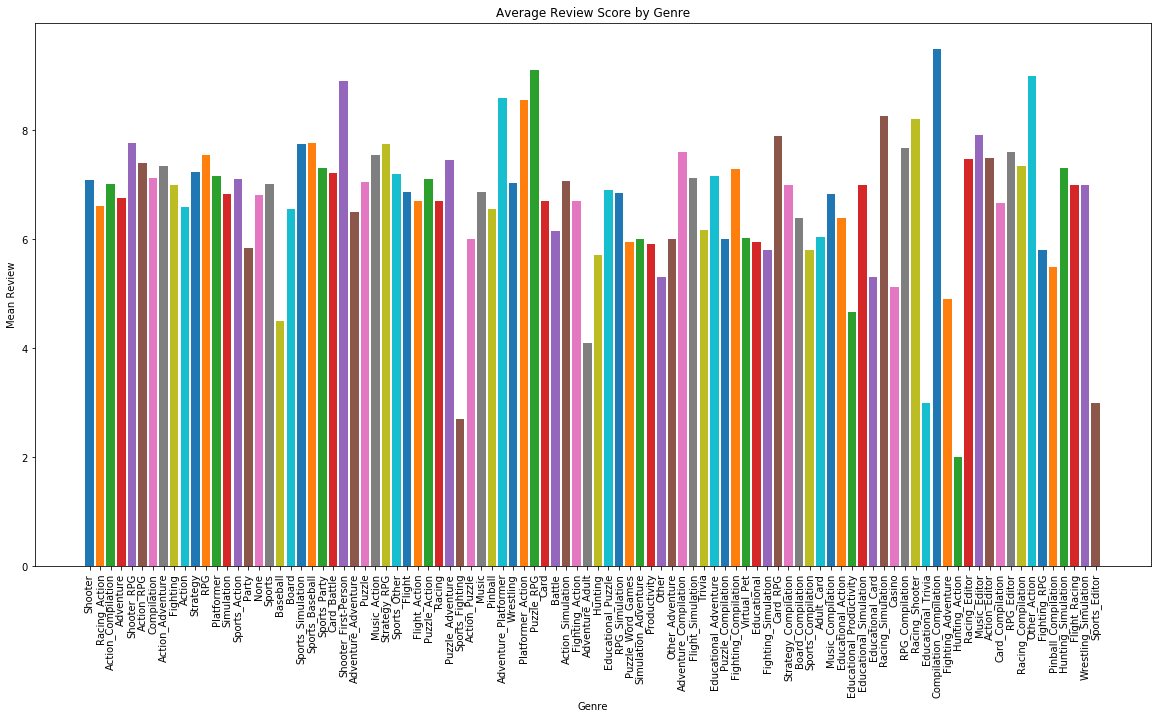

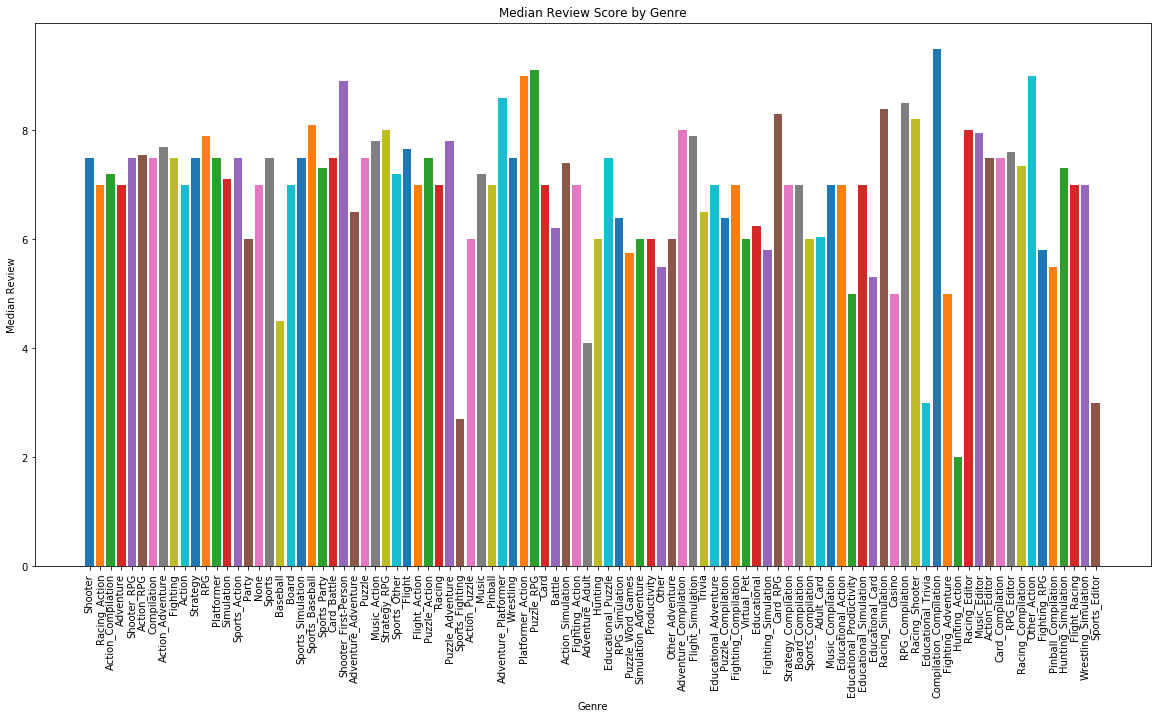

In [48]:
#average review score by Genre
plt.figure(figsize = (20,10))
for df in reviews2.keys():
    plt.bar('%s' %df,reviews2['%s' %df].Score.mean())

plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Mean Review')
plt.title('Average Review Score by Genre')
plt.show()


#median review score by Genre
plt.figure(figsize = (20,10))
for df in reviews2.keys():
    plt.bar('%s' %df,reviews2['%s' %df].Score.median())

plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Median Review')
plt.title('Median Review Score by Genre')
plt.show()

Next, we create functions that allow us to analyze specific platforms (or genres)

In [53]:
from random import randint
import matplotlib.patches as mpatches

def breakdown_by_platform(lop): #lop = list of platforms
    color = []
    handle = []
    for j in range(len(lop)):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    color_num = 0   
    for i in lop:
        plt.figure(1, figsize = (18,10))
        plt.scatter(reviews[i].Genre, reviews[i].Score, color = color[color_num])
        label = mpatches.Patch(color= color[color_num], label= '%s' %i)
        handle.append(label)
        plt.legend(handles=handle, loc = 'best')    
        plt.xticks(rotation=90)
        plt.title('Genre vs. Score by Platform')
        plt.xlabel('Genre')
        plt.ylabel('Score')
        plt.figure(2, figsize = (18,5))
        plt.subplot(1,2,1)
        plt.bar('%s' %i, reviews[i].Score.mean(), color = color[color_num])
        plt.title('Average Platform Score')
        plt.xlabel('Platform')
        plt.ylabel('Score')
        #plt.legend(handles=handle, loc = 'best')    
        plt.xticks(rotation=45)
        plt.subplot(1,2,2)
        plt.bar('%s' %i, reviews[i].Score.median(), color = color[color_num])
        plt.title('Median Platform Score')
        plt.xlabel('Platform')
        plt.ylabel('Score')
        #plt.legend(handles=handle, loc = 'best')    
        plt.xticks(rotation=45)
        color_num += 1
    plt.show()

    
def breakdown_by_genre(log): #log = list of genres
    color = []
    handle = []
    for j in range(len(log)):
        color.append('#%06X' % randint(0, 0xFFFFFF))
    color_num = 0   
    for i in log:
        plt.figure(1, figsize = (18,10))
        plt.scatter(reviews2[i].Platform, reviews2[i].Score, color = color[color_num])
        label = mpatches.Patch(color= color[color_num], label= '%s' %i)
        handle.append(label)
        plt.legend(handles=handle, loc = 'best')    
        plt.xticks(rotation=90)
        plt.title('Platform vs. Score by Genre')
        plt.xlabel('Platform')
        plt.ylabel('Score')
        plt.figure(2, figsize = (18,5))
        plt.subplot(1,2,1)
        plt.bar('%s' %i, reviews2[i].Score.mean(), color = color[color_num])
        plt.title('Average Genre Score')
        plt.xlabel('Genre')
        plt.ylabel('Score')
        #plt.legend(handles=handle, loc = 'best')    
        plt.xticks(rotation=45)
        plt.subplot(1,2,2)
        plt.bar('%s' %i, reviews2[i].Score.median(), color = color[color_num])
        plt.title('Median Genre Score')
        plt.xlabel('Genre')
        plt.ylabel('Score')
        #plt.legend(handles=handle, loc = 'best')    
        plt.xticks(rotation=45)
        color_num += 1
    plt.show()

For example, if we just wanted information about PlayStation 1 through 4, or information about the RPG and Action genres:

/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


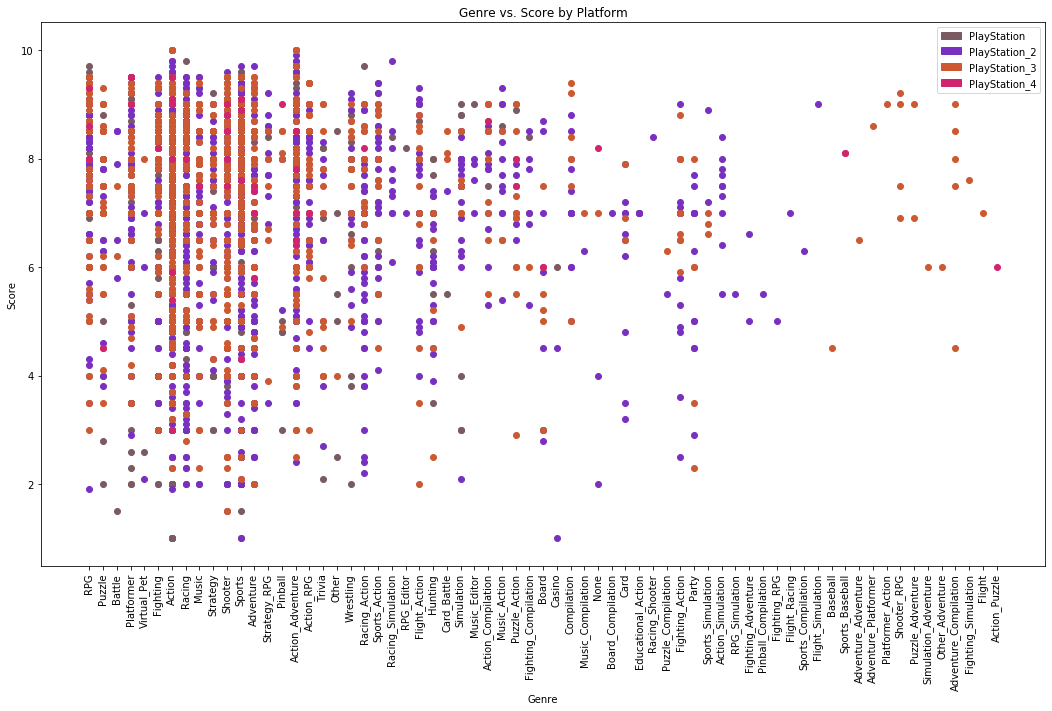

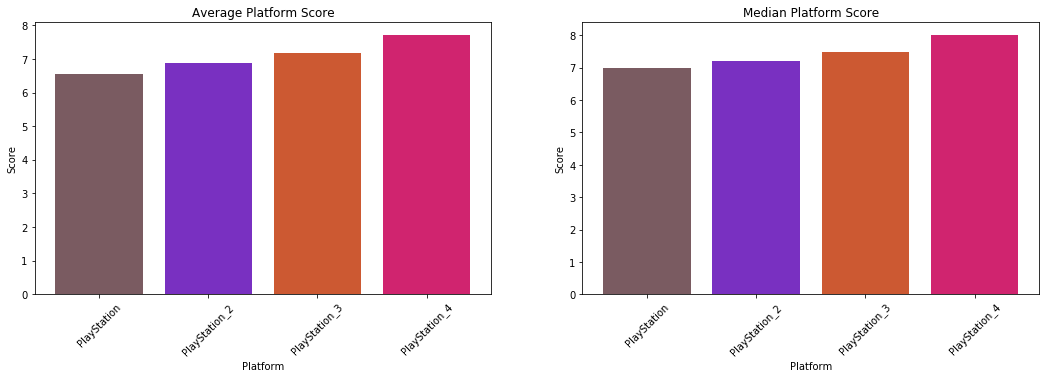

/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


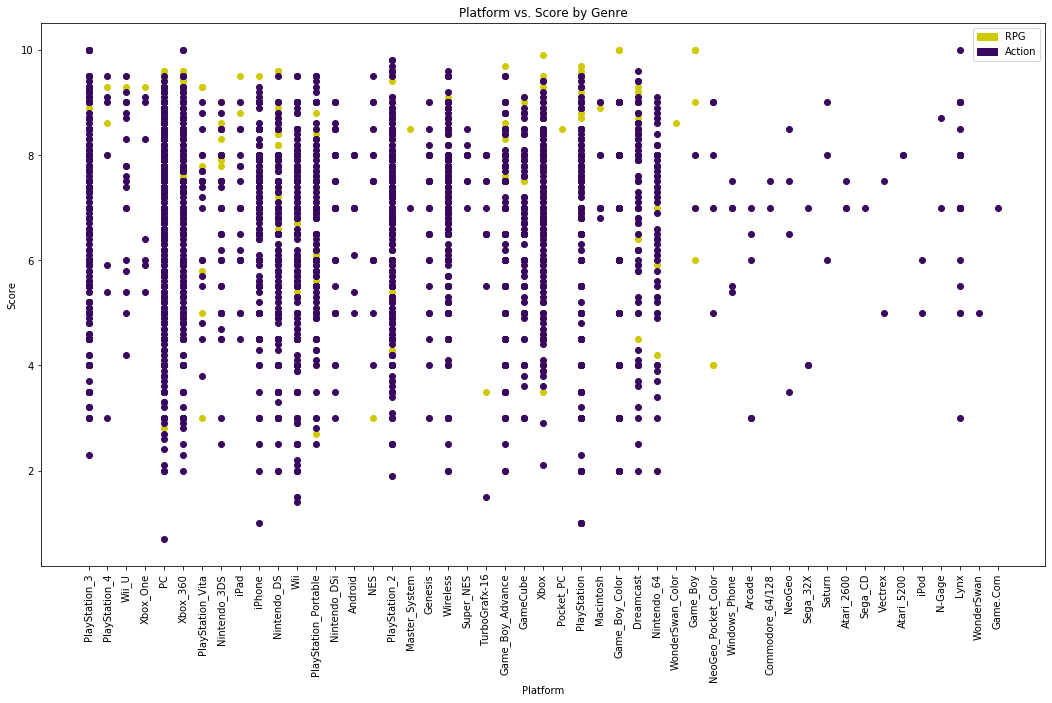

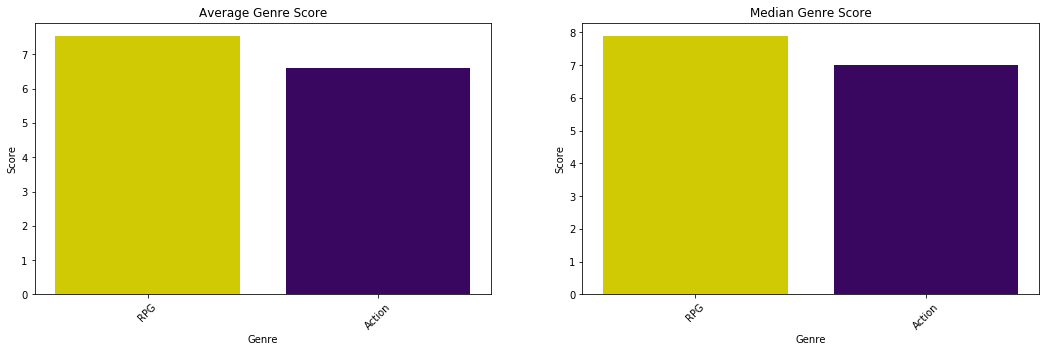

In [54]:
breakdown_by_platform(['PlayStation', 'PlayStation_2', 'PlayStation_3', 'PlayStation_4'])


breakdown_by_genre(['RPG', 'Action'])

For ease of analysis, we group the platforms by their respective developers

In [17]:
developers = {'Sony': ['PlayStation','PlayStation_2','PlayStation_3', 'PlayStation_4','PlayStation_Vita', 'PlayStation_Portable'], 
              'Nintendo': ['NES','Super_NES', 'Nintendo_64', 'Nintendo_64DD','Game_Boy', 'Game_Boy_Advance', 'Game_Boy_Color', 'GameCube', 'Wii', 'Wii_U', 'Nintendo_DS', 'Nintendo_3DS', 'Nintendo_DSi'],
              'Microsoft': ['Pocket_PC','Xbox', 'Xbox_360', 'Xbox_One', 'Windows_Surface', 'Windows_Phone'],
             'Sega': ['Genesis','Saturn','Master_System','Sega_CD','Sega_32X', 'Dreamcast','Dreamcast_VMU'],
             'Apple': ['Macintosh','iPod', 'iPhone', 'iPad'],
             'Atari': ['Atari_2600','Atari_5200','Lynx'],
             'Bandai': ['WonderSwan','WonderSwan_Color','Vectrex'],
             'Other': ['Android','Linux','N-Gage','Commodore_64/128','TurboGrafx-CD','TurboGrafx-16','NeoGeo','NeoGeo_Pocket_Color','Game.Com'],
             'Type': ['Arcade','PC','Web_Games', 'Wireless','DVD_/_HD_Video_Game' ]}


This allows us to easily graph information about a specific group of platforms, such as all those created by Nintendo.

/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/psteller/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


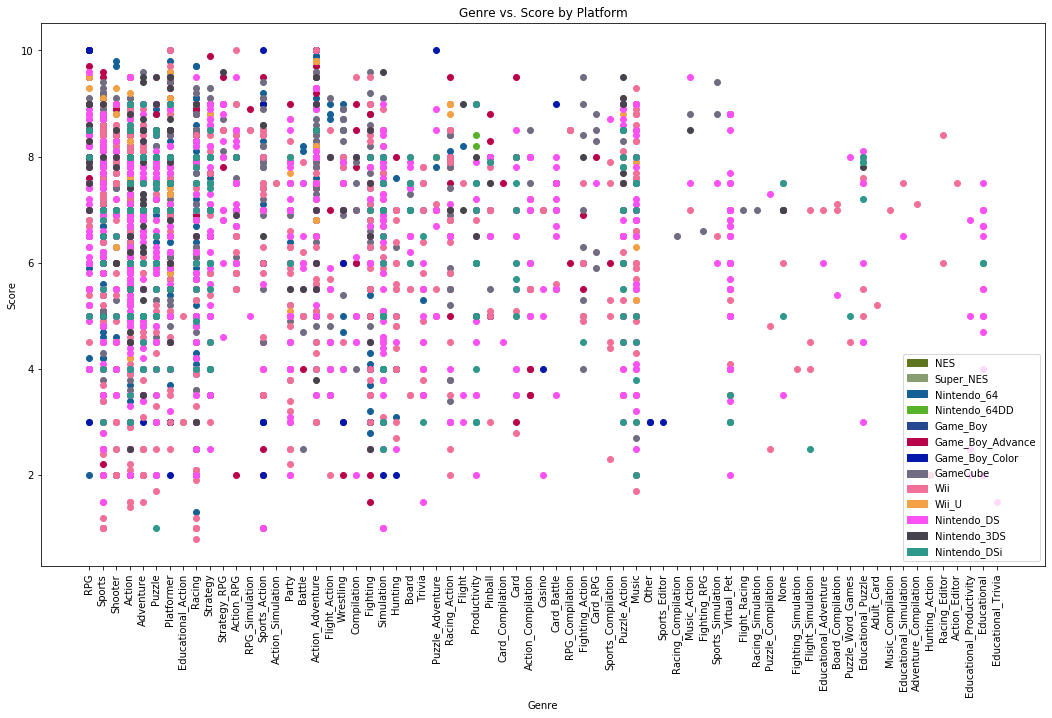

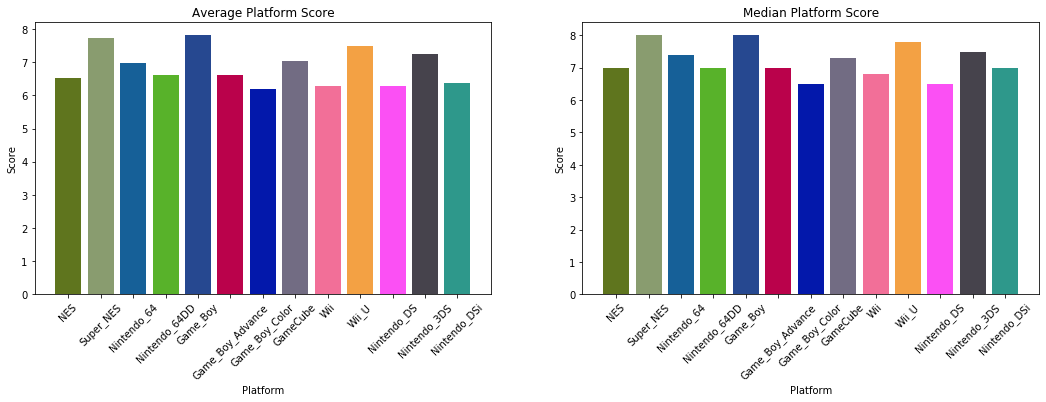

In [55]:
breakdown_by_platform(developers['Nintendo'])

### Analyzing by the number of platforms
Does the number of platforms a game is available on impact its rating? Let's examine below by creating a new dataframe that contains a column for each platform, with a 1 in that column if the game is available on that platform, and a 0 otherwise. By summing these platform columns, we get a Total_Platforms column, the number of platforms each game is available on.

In [19]:
multi_platform_games = pd.DataFrame(columns = ['Game', 'Score', 'Genre', 'Xbox_One', 'Wii_U', 'PlayStation_3', 'PlayStation_4', 'PC',
       'Xbox_360', 'PlayStation_Vita', 'iPhone', 'Nintendo_3DS', 'iPad',
       'Android', 'Windows_Phone', 'Linux', 'Macintosh', 'Wii',
       'Windows_Surface', 'PlayStation_Portable', 'Nintendo_DS', 'Arcade',
       'Web_Games', 'Nintendo_DSi', 'Wireless', 'PlayStation_2',
       'Super_NES', 'NES', 'Commodore_64/128', 'Master_System', 'Genesis',
       'TurboGrafx-16', 'NeoGeo', 'Sega_32X', 'TurboGrafx-CD', 'Saturn',
       'Atari_2600', 'Game_Boy', 'Sega_CD', 'Vectrex', 'iPod',
       'Atari_5200', 'Xbox', 'GameCube', 'Game_Boy_Advance', 'Dreamcast',
       'N-Gage', 'Pocket_PC', 'PlayStation', 'Game_Boy_Color',
       'DVD_/_HD_Video_Game', 'Nintendo_64', 'WonderSwan_Color', 'Lynx',
       'Nintendo_64DD', 'NeoGeo_Pocket_Color', 'WonderSwan', 'Game.Com',
       'Dreamcast_VMU'])

In [20]:
multi_platform_games.Game = gamedata.Game.unique()

In [22]:

for i in gamedata.Platform.unique():
    for j in range(multi_platform_games.shape[0]):
        for k in reviews[i].Game.unique():
            if multi_platform_games.loc[j,'Game'] == k:
                multi_platform_games.loc[j, i] = 1 

    multi_platform_games.loc[:,i]= multi_platform_games.loc[:,i].fillna(0)    

In [24]:
for j in range(multi_platform_games.shape[0]):
    for i in range(17534):
        if gamedata.Game[i] == multi_platform_games.Game[j]:
            multi_platform_games.loc[j,'Score'] = gamedata.loc[i,'Score']
            multi_platform_games.loc[j,'Genre'] = gamedata.loc[i,'Genre']
            

In [25]:
for i in range(multi_platform_games.shape[0]):
    multi_platform_games.loc[i,'Total_Platforms'] = multi_platform_games.iloc[i,3:].sum()


In [29]:
multi_platform_games.to_csv(r'multi_platform_games.csv', index = False)

In [30]:
multi_platform_games.head()

,Game,Score,Genre,Xbox_One,Wii_U,PlayStation_3,PlayStation_4,PC,Xbox_360,PlayStation_Vita,...,DVD_/_HD_Video_Game,Nintendo_64,WonderSwan_Color,Lynx,Nintendo_64DD,NeoGeo_Pocket_Color,WonderSwan,Game.Com,Dreamcast_VMU,Total_Platforms
0,Wolfenstein: The New Order,7.8,Shooter,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,Mario Kart 8,9,Racing_Action,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,Sportsfriends,8.7,Action_Compilation,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3.0
3,Super TIME Force,7.5,Shooter,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2.0
4,The Walking Dead: Season Two -- Episode 3: In ...,9,Adventure,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1.0


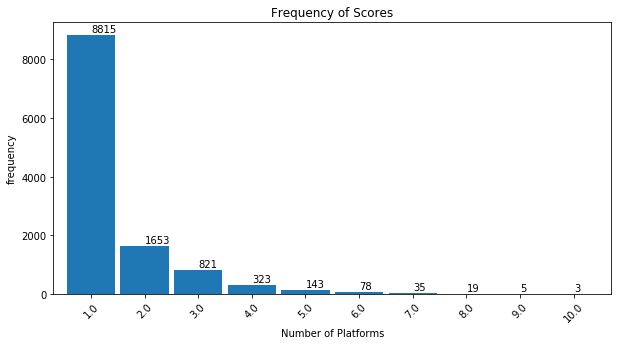

In [45]:
x = np.sort(multi_platform_games.Total_Platforms.unique())
y = pd.Series(multi_platform_games.loc[:,'Total_Platforms']).value_counts().loc[x]
ax = y.plot(kind='bar', figsize=(10,5), title='Scores', width = 0.90 )

plt.xticks(rotation = 45)
plt.xlabel('Number of Platforms')
plt.ylabel('frequency')
plt.title('Frequency of Scores')
for i in dict(y).keys():
    plt.text(i-1, dict(y)[i]+100, str(dict(y)[i]))
plt.show()



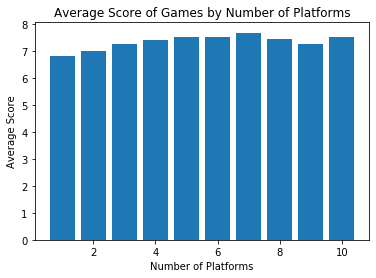

In [43]:

dictionary = {}
for j in range(10):
    score = 0
    tally = 0
    for i in range(multi_platform_games.shape[0]):
        if multi_platform_games.loc[i, 'Total_Platforms'] == j+1:
            score += multi_platform_games.loc[i, 'Score']
            tally += 1
    dictionary[j+1] = score/tally
    
            


plt.bar(dictionary.keys(), dictionary.values())

plt.xlabel('Number of Platforms')
plt.ylabel('Average Score')
plt.title('Average Score of Games by Number of Platforms')

plt.show()

In [56]:
gamedata.to_csv(r'gameddata_cleaned.csv', index = False)